# EWMPCA new data alpha seeking

In [1]:
first_year = 2016; last_year = 2020;

In [2]:

if (!require("quantmod")) {
    install.packages("quantmod");
    library("quantmod");
}

getSymbols(c("NVDA", "NFLX", "AMZN", "ISIG", "AAPL"),src="yahoo");

df = cbind(
  coredata(NVDA["2008-01/2021-08"])[,4],
  coredata(NFLX["2008-01/2021-08"])[,4],
  coredata(AMZN["2008-01/2021-08"])[,4],
  coredata(ISIG["2008-01/2021-08"])[,4],
  coredata(AAPL["2008-01/2021-08"])[,4]
);

df = na.omit(df);
tmp = c();
for(i in 1:5) {
    tmp = cbind(tmp, diff(log(df[,i])));
}

df = as.data.frame(tmp);


Loading required package: quantmod

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




[1] "NVDA" "NFLX" "AMZN" "ISIG" "AAPL"

In [3]:
tail(df)

,V1,V2,V3,V4,V5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3435,-0.007542762,0.0001444892,0.012146235,-0.044154329,-0.0006014232
3436,0.019088940,-0.0105904877,-0.001998528,-0.005486982,-0.0084569537
3437,-0.006549162,0.0046278264,0.005085305,0.028476500,-0.0055424814
3438,0.025413000,0.0158698926,0.010090620,0.078395939,0.0071588946
3439,0.002294609,0.0129057167,0.021249673,0.043537710,0.0299637224
3440,-0.013445054,0.0053022646,0.014282715,-0.053475680,-0.0084604080


In [4]:
Z = prcomp(df[,1:3], retx = TRUE)

In [5]:
classical_pca = Z$x;

In [6]:
head(classical_pca)

PC1,PC2,PC3
-0.018529836,0.0005079022,0.004918969
-0.122159714,-0.0322014432,0.020335199
-0.058381518,-0.0872855309,-0.034196506
-0.039948533,0.0586329867,0.001221824
0.006153686,0.0430111844,0.042123352
0.031050292,-0.0642012620,0.020683488


In [7]:
source("xpca.R")

In [8]:
minLimit = min(dim(df)[1], 100);
cov_init = cov(df[1:minLimit,1:3]);
W_init = sorted_eig(cov_init);

[1] "eigen values:"
[1] 0.000744390 0.001659226 0.002425030
[1] "eigen vectors:"
          [,1]       [,2]        [,3]
[1,] 0.7895405  0.4858891  0.37488354
[2,] 0.5108206 -0.8588753  0.03735733
[3,] 0.3401297  0.1620031 -0.92631893


In [9]:
W_init

0.7895405,0.4858891,0.37488354
0.5108206,-0.8588753,0.03735733
0.3401297,0.1620031,-0.92631893


In [10]:
Z2 = ewmpca(df[,1:3], 0.9305, W_init, return_extra = TRUE);
ewm_pca = Z2$pca;

In [11]:
dim(ewm_pca)

[1] 3440    3

In [12]:
head(ewm_pca)

0.000000000,0.000000e+00,0.000000e+00
-0.102129371,6.938894e-18,3.469447e-18
-0.047146888,-5.709182e-02,-5.631499e-02
0.008158715,6.121671e-02,1.112047e-02
0.038417237,2.254948e-02,4.730132e-02
-0.075309766,3.069198e-02,4.148502e-03


In [13]:
cross_cov = cov(cbind(classical_pca, ewm_pca));

In [14]:
cross_cov

,PC1,PC2,PC3,,,
PC1,1.508296e-03,1.499713e-18,4.425837e-19,1.363713e-03,1.744698e-04,-1.468627e-05
PC2,1.499713e-18,6.697502e-04,6.937195e-19,4.532105e-05,1.870268e-05,7.510573e-05
PC3,4.425837e-19,6.937195e-19,3.368744e-04,2.162219e-05,5.102056e-05,8.272526e-05
,1.363713e-03,4.532105e-05,2.162219e-05,1.517716e-03,1.052573e-04,-1.188522e-05
,1.744698e-04,1.870268e-05,5.102056e-05,1.052573e-04,5.050015e-04,-3.305444e-05
,-1.468627e-05,7.510573e-05,8.272526e-05,-1.188522e-05,-3.305444e-05,2.345002e-04


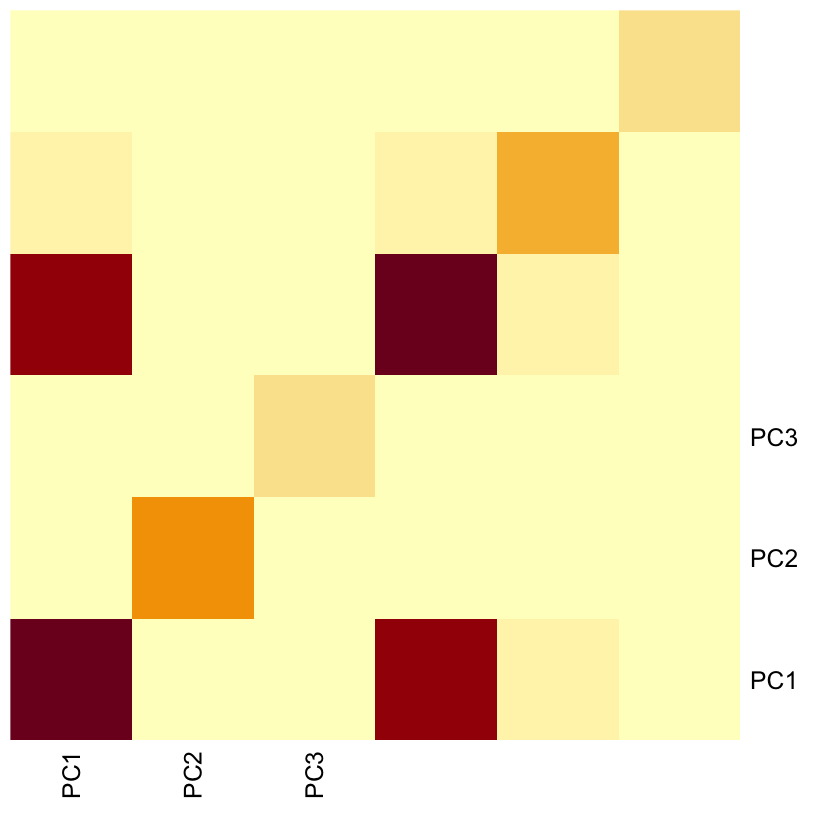

In [15]:
heatmap(cross_cov, Colv = NA, Rowv = NA, symm = TRUE)

In [16]:
cross_cov

,PC1,PC2,PC3,,,
PC1,1.508296e-03,1.499713e-18,4.425837e-19,1.363713e-03,1.744698e-04,-1.468627e-05
PC2,1.499713e-18,6.697502e-04,6.937195e-19,4.532105e-05,1.870268e-05,7.510573e-05
PC3,4.425837e-19,6.937195e-19,3.368744e-04,2.162219e-05,5.102056e-05,8.272526e-05
,1.363713e-03,4.532105e-05,2.162219e-05,1.517716e-03,1.052573e-04,-1.188522e-05
,1.744698e-04,1.870268e-05,5.102056e-05,1.052573e-04,5.050015e-04,-3.305444e-05
,-1.468627e-05,7.510573e-05,8.272526e-05,-1.188522e-05,-3.305444e-05,2.345002e-04


In [17]:
cross_corr = cov_to_cor(cross_cov);

In [18]:
cross_corr

,PC1,PC2,PC3,,,
PC1,1.000000e+00,1.492136e-15,6.208948e-16,0.90133128,0.19990823,-0.02469429
PC2,1.492136e-15,1.000000e+00,1.460473e-15,0.04495193,0.03215889,0.18951562
PC3,6.208948e-16,1.460473e-15,1.000000e+00,0.03023921,0.12369861,0.29432863
,9.013313e-01,4.495193e-02,3.023921e-02,1.00000000,0.12022937,-0.01992235
,1.999082e-01,3.215889e-02,1.236986e-01,0.12022937,1.00000000,-0.09605321
,-2.469429e-02,1.895156e-01,2.943286e-01,-0.01992235,-0.09605321,1.00000000


In [19]:
dim(cross_cov)

[1] 6 6

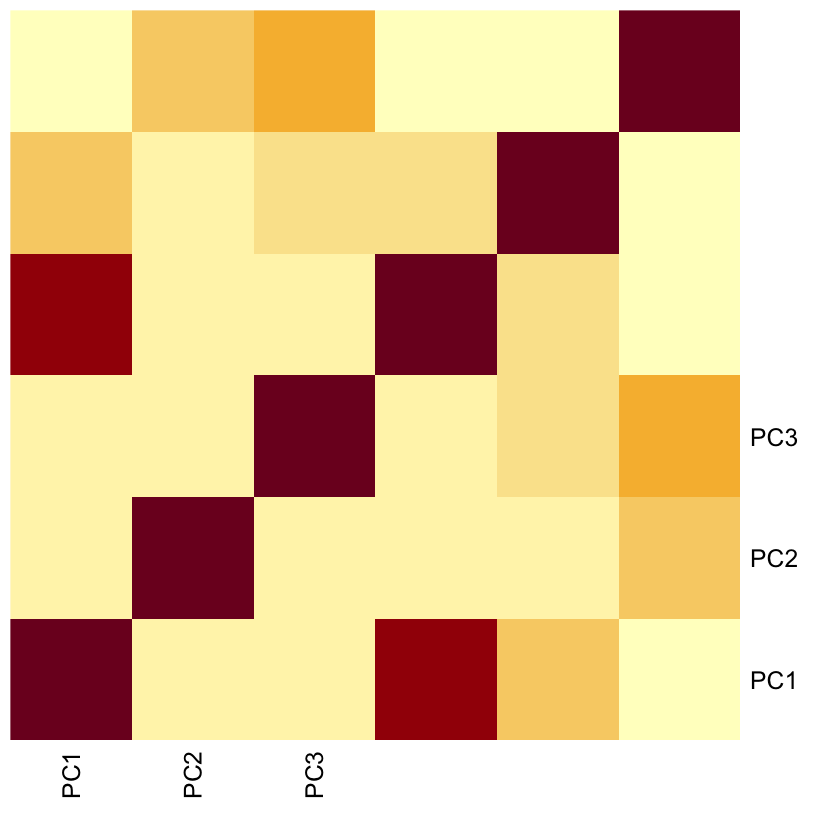

In [20]:
heatmap(cross_corr, Colv = NA, Rowv = NA, symm = TRUE)

In [21]:
ewm_pca_df = data.frame(ewm_pca)

In [22]:
names(ewm_pca_df) = c("pc1", "pc2", "pc3")

In [23]:
ewm_pca_df$ISIG = df[,4];
ewm_pca_df$AAPL = df[,5];

In [24]:
T = dim(ewm_pca_df)[1];
glm(ISIG ~ pc1, data = ewm_pca_df)


Call:  glm(formula = ISIG ~ pc1, data = ewm_pca_df)

Coefficients:
(Intercept)          pc1  
 -0.0002754    0.0987487  

Degrees of Freedom: 3439 Total (i.e. Null);  3438 Residual
Null Deviance:	    6.902 
Residual Deviance: 6.851 	AIC: -11620

In [25]:
glm(ISIG ~ pc2, data = ewm_pca_df)


Call:  glm(formula = ISIG ~ pc2, data = ewm_pca_df)

Coefficients:
(Intercept)          pc2  
 -0.0002499    0.0107670  

Degrees of Freedom: 3439 Total (i.e. Null);  3438 Residual
Null Deviance:	    6.902 
Residual Deviance: 6.901 	AIC: -11600

In [26]:
glm(ISIG ~ pc3, data = ewm_pca_df)


Call:  glm(formula = ISIG ~ pc3, data = ewm_pca_df)

Coefficients:
(Intercept)          pc3  
 -0.0002618    0.0934287  

Degrees of Freedom: 3439 Total (i.e. Null);  3438 Residual
Null Deviance:	    6.902 
Residual Deviance: 6.895 	AIC: -11600

In [27]:
glm(ISIG ~ pc1 + pc2 + pc3, data = ewm_pca_df)


Call:  glm(formula = ISIG ~ pc1 + pc2 + pc3, data = ewm_pca_df)

Coefficients:
(Intercept)          pc1          pc2          pc3  
 -0.0002868    0.0997666   -0.0036144    0.0979757  

Degrees of Freedom: 3439 Total (i.e. Null);  3436 Residual
Null Deviance:	    6.902 
Residual Deviance: 6.843 	AIC: -11620

In [28]:
cor(ewm_pca)

1.00000000,0.12022937,-0.01992235
0.12022937,1.00000000,-0.09605321
-0.01992235,-0.09605321,1.00000000


In [29]:
glm(AAPL ~ pc1, data = ewm_pca_df)


Call:  glm(formula = AAPL ~ pc1, data = ewm_pca_df)

Coefficients:
(Intercept)          pc1  
  0.0008384    0.2409406  

Degrees of Freedom: 3439 Total (i.e. Null);  3438 Residual
Null Deviance:	    1.391 
Residual Deviance: 1.088 	AIC: -17950

In [30]:
glm(AAPL ~ pc2, data = ewm_pca_df)


Call:  glm(formula = AAPL ~ pc2, data = ewm_pca_df)

Coefficients:
(Intercept)          pc2  
  0.0009044    0.0487973  

Degrees of Freedom: 3439 Total (i.e. Null);  3438 Residual
Null Deviance:	    1.391 
Residual Deviance: 1.387 	AIC: -17120

In [31]:
glm(AAPL ~ pc3, data = ewm_pca_df)


Call:  glm(formula = AAPL ~ pc3, data = ewm_pca_df)

Coefficients:
(Intercept)          pc3  
  0.0008991   -0.0273999  

Degrees of Freedom: 3439 Total (i.e. Null);  3438 Residual
Null Deviance:	    1.391 
Residual Deviance: 1.391 	AIC: -17110

In [32]:
glm(AAPL ~ pc1 + pc2 + pc3, data = ewm_pca_df)


Call:  glm(formula = AAPL ~ pc1 + pc2 + pc3, data = ewm_pca_df)

Coefficients:
(Intercept)          pc1          pc2          pc3  
  0.0008397    0.2409888   -0.0024485   -0.0155309  

Degrees of Freedom: 3439 Total (i.e. Null);  3436 Residual
Null Deviance:	    1.391 
Residual Deviance: 1.088 	AIC: -17950

In [33]:
class_pca_df = data.frame(classical_pca)

In [34]:
names(class_pca_df) = c("pc1", "pc2", "pc3")

In [35]:
class_pca_df$ISIG = df[,4];
class_pca_df$AAPL = df[,5];

In [36]:
glm(ISIG ~ pc1, data = class_pca_df)


Call:  glm(formula = ISIG ~ pc1, data = class_pca_df)

Coefficients:
(Intercept)          pc1  
 -0.0002517    0.1013829  

Degrees of Freedom: 3439 Total (i.e. Null);  3438 Residual
Null Deviance:	    6.902 
Residual Deviance: 6.848 	AIC: -11630

In [37]:
glm(ISIG ~ pc2, data = class_pca_df)


Call:  glm(formula = ISIG ~ pc2, data = class_pca_df)

Coefficients:
(Intercept)          pc2  
 -0.0002517    0.1011990  

Degrees of Freedom: 3439 Total (i.e. Null);  3438 Residual
Null Deviance:	    6.902 
Residual Deviance: 6.878 	AIC: -11610

In [38]:
glm(ISIG ~ pc3, data = class_pca_df)


Call:  glm(formula = ISIG ~ pc3, data = class_pca_df)

Coefficients:
(Intercept)          pc3  
 -0.0002517   -0.0637690  

Degrees of Freedom: 3439 Total (i.e. Null);  3438 Residual
Null Deviance:	    6.902 
Residual Deviance: 6.897 	AIC: -11600

In [39]:
glm(ISIG ~ pc1 + pc2 + pc3, data = class_pca_df)


Call:  glm(formula = ISIG ~ pc1 + pc2 + pc3, data = class_pca_df)

Coefficients:
(Intercept)          pc1          pc2          pc3  
 -0.0002517    0.1013829    0.1011990   -0.0637690  

Degrees of Freedom: 3439 Total (i.e. Null);  3436 Residual
Null Deviance:	    6.902 
Residual Deviance: 6.82 	AIC: -11640

In [40]:
glm(AAPL ~ pc1, data = class_pca_df)


Call:  glm(formula = AAPL ~ pc1, data = class_pca_df)

Coefficients:
(Intercept)          pc1  
  0.0008962    0.2707471  

Degrees of Freedom: 3439 Total (i.e. Null);  3438 Residual
Null Deviance:	    1.391 
Residual Deviance: 1.011 	AIC: -18210

In [41]:
norm(classical_pca - ewm_pca, type = "2")

[1] 2.017706

In [42]:
max(classical_pca - ewm_pca)

[1] 0.508251

In [43]:
max(ewm_pca)

[1] 0.3221858

In [44]:
dim(ewm_pca %*% t(Z$rotation))

[1] 3440    3

In [45]:
Z$rotation

,PC1,PC2,PC3
V1,0.5882170,0.73499657,0.3373142
V2,0.7008161,-0.67142771,0.2409183
V3,0.4035562,0.09468299,-0.9100426


In [46]:
dim(df)

[1] 3440    5

In [47]:
norm(as.matrix(df[,1:3]) - ewm_pca %*% t(Z2$W), type="2")

[1] 2.226706

In [61]:
TT = dim(df)[1];
TT;

[1] 3440

In [63]:
norm(as.matrix(df[(TT-100):TT,1:3]) - (ewm_pca %*% t(Z2$W))[(TT-100):TT,], type="2")

[1] 0.1942095

In [64]:
norm(as.matrix(df[(TT-1000):TT,1:3]) - (ewm_pca %*% t(Z2$W))[(TT-1000):TT,], type="2")

[1] 0.8735572

In [65]:
norm(as.matrix(df[(TT-3000):TT,1:3]) - (ewm_pca %*% t(Z2$W))[(TT-3000):TT,], type="2")

[1] 2.011628

In [51]:
norm(as.matrix(df[,1:3]) - classical_pca %*% t(Z$rotation), type="2")

[1] 0.119268

In [52]:
comb_pca = data.frame(cbind(as.matrix(classical_pca), as.matrix(ewm_pca), df[,4], df[,5]));

In [53]:
names(comb_pca) = c("pc1", "pc2", "pc3", "epc1", "epc2", "epc3", "ISIG", "AAPL");

In [54]:
glm(AAPL ~ pc1 + epc1, data = comb_pca)


Call:  glm(formula = AAPL ~ pc1 + epc1, data = comb_pca)

Coefficients:
(Intercept)          pc1         epc1  
  0.0008991    0.2819944   -0.0124397  

Degrees of Freedom: 3439 Total (i.e. Null);  3437 Residual
Null Deviance:	    1.391 
Residual Deviance: 1.011 	AIC: -18200

In [55]:
ewm_pca__ = ewmpca(df[,1:3], 0.9305, W_init);

In [56]:
norm(ewm_pca__ - ewm_pca, type="2")

[1] 0

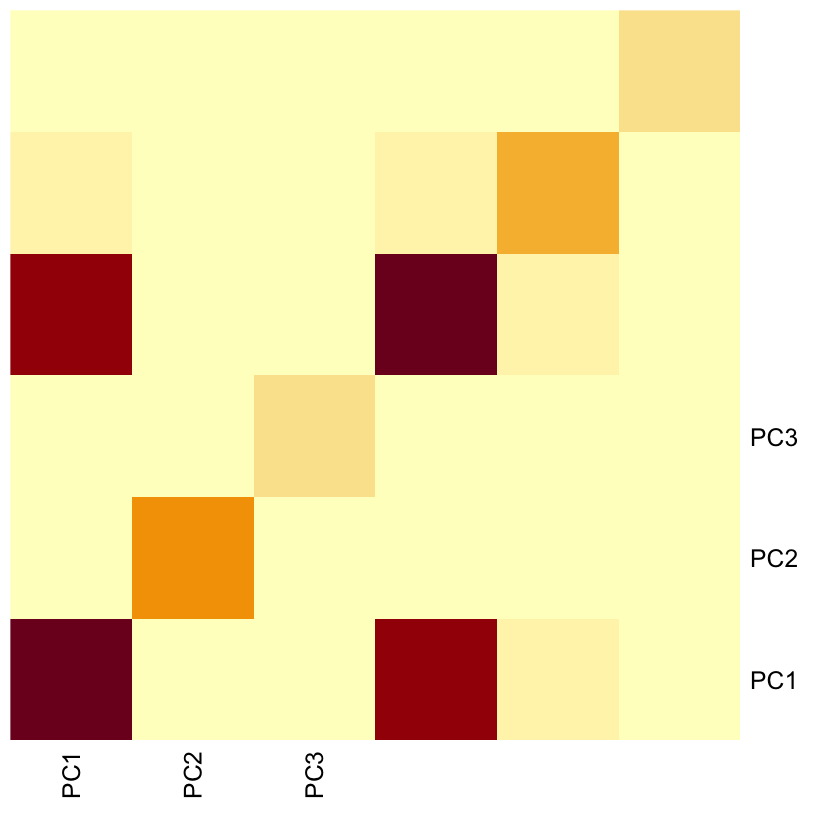

In [57]:
cross_cov = cov(cbind(classical_pca, ewm_pca__));
heatmap(cross_cov, Colv = NA, Rowv = NA, symm = TRUE)

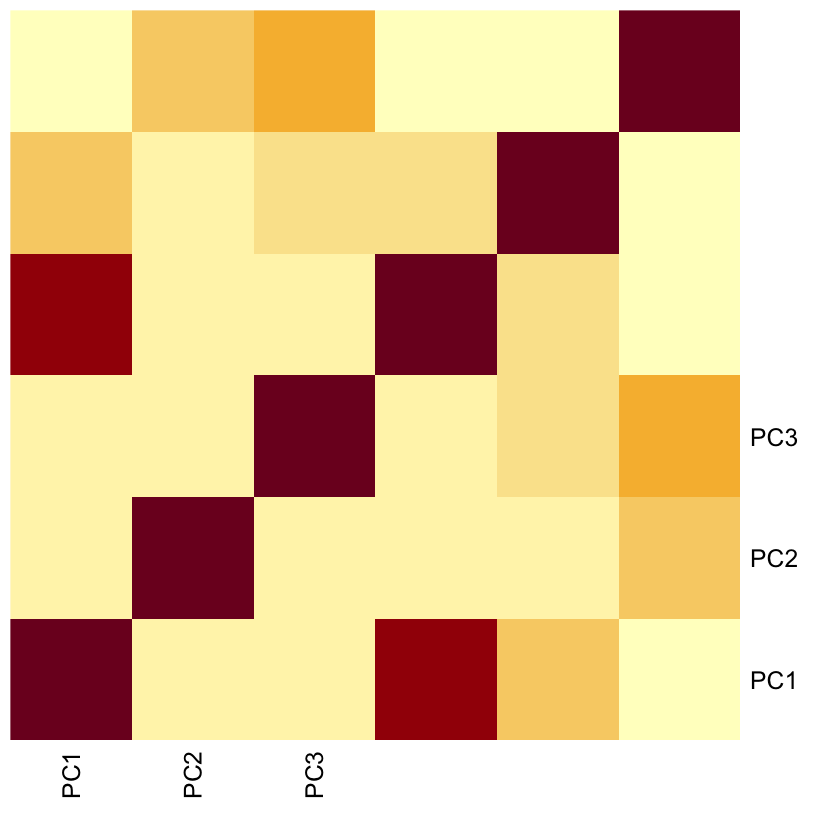

In [58]:
cross_corr = cov_to_cor(cross_cov);
heatmap(cross_corr, Colv = NA, Rowv = NA, symm = TRUE)